# Homework - 4
***
**Name**: Ryan Leonard
***

Collaborated with Jack Kawell and Matt Leubbers

This assignment is due on Canvas by **5pm on Friday November 16th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.

## Kernels [5 - points]

**Q:** We have seen two different definitions of kernels during the course:
* Definition 1: $K(x, x^{\prime})$ is a kernel if it can be written as an inner product $\phi(x)^T\phi(x^{\prime})$ for some feature mapping $x \rightarrow \phi(x)$.
* Definition 2: $K(x, x^{\prime})$ is a kernel if for any finite set of training examples $x_1, \cdots, x_n$, the $n \times n$ matrix __K__ such that $K_{ij} = K(x_i, x_j)$ is positive semidefinite

Show that definition 1 implies definition 2.

_Hint:_ you could show this by proving that for real numbers $\alpha_1, \cdots, \alpha_n$ and points $x_1, \cdots, x_n$,
$$ \sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jK(x_i, x_j) \geq 0$$
if the kernel can be written as $K(x, x^{\prime}) = \phi(x)^T\phi(x^{\prime})$


Taking advantage of the hint, we show that the linear kernel satisfies the mercer condition:

1. $\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jK(x_i, x_j) \geq 0$

2. $\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_j \sum_{l=1}^n \phi(x)_{i, l}\phi(x)_{j, l} \geq 0$

3. $\sum_{l=1}^n \sum_{i=1}^n \alpha_i \phi(x)_{i, l}  \sum_{j=1}^n \alpha_j\phi(x)_{j, l} \geq 0$

4. $\sum_{l=1}^n (\sum_{i=1}^n \alpha_i \phi(x)_{i, l})^2\geq 0$

where for real values of $\alpha$ and x, each square value is obviously greater than zero, and so the sum of the squares is also greater than zero. 

Now, because satisfying the mercer condition proves that the resulting matrix is positive semidefinite, we have shown that definition 1 implies definition 2.

**Q:** One way to construct kernels is to build them from simpler ones. We have already seen three possible "composition rules": assuming $K_1(x, x^\prime)$ and $K_2(x, x^\prime)$ are kernels, then the following are also kernels:
* (scaling) $f(x)K_1(x, x^\prime)f(x^\prime), \ f(x) \in \mathbb R$
* (sum) $K_1(x, x^\prime) + K_2(x, x^\prime)$
* (product) $K_1(x, x^\prime)K_2(x, x^\prime)$

(a) Let $\phi^{(1)}(x)$ and $\phi^{(2)}(x)$ be the feature vectors corresponding to kernels $K_1(x, x^\prime)$ and $K_2(x, x^\prime)$, respectively. These feature vectors may be of different length. Show that the product $K_1(x, x^\prime)K_2(x, x^\prime)$ is a kernel by showing that its feature vectors are given by $\phi(x)$ whose $(i, j)^{th}$ component (double indexed vector) is $\phi_i^{(1)}(x)\phi_j^{(2)}(x)$.

(b) Use the composition rules to build a normalized cubic polynomial kernel defined as:
$$K(x, x^\prime) = \bigg( 1 + \bigg(\frac{x}{||x||}\bigg)^T\bigg(\frac{x^\prime}{||x^\prime||}\bigg)\bigg)^3$$

You can assume that you already have a constant kernel $K_0(x, x^\prime) = 1$ and a linear kernel $K_1(x, x^\prime) = x^Tx^\prime$. Identify which rules you are employing at each step.

(a) 

$$ K_1(x, x') K_2(x, x') = \phi^{(1)T}(x) \phi^{(1)}(x')\phi^{(2)T}(x) \phi^{(2)}(x')$$
$$ = \sum_{i=1}^{N} \phi^{(1)}_i(x) \phi^{(1)}_i(x') \sum_{j=1}^{N} \phi^{(2)}_j(x) \phi^{(2)}_j(x') $$
$$  = \sum_{i=1}^{N}\sum_{j=1}^{N}  \phi^{(1)}_i(x) \phi^{(2)}_j(x)  \phi^{(1)}_i(x')  \phi^{(2)}_j(x') $$
$$ = \sum_{i=1}^{N} \psi_i(x) \psi_i(x') $$
$$ = \psi(x)^T \psi(x')$$
where $\psi_i(x) = \phi_i^{(1)}(x) \phi_j^{(2)}(x)$ Because this is a valid inner product, K must also be a valid kernel.

(b) 
First, we define a third kernel $K_3$, using the scaling identity, and $K_1$ to be $\frac{x}{||x||}$ which will give: $\frac{x}{||x||}^T\frac{x'}{||x'||}$, which in turn can be used to define a fourth kernel: $K_4 = 1  + K_3$, from the sum identity. Next, using the product identity, we can define $K_5 = (K_4)^3$, which is our desired result:
$$K_5(x, x^\prime) = \bigg( 1 + \bigg(\frac{x}{||x||}\bigg)^T\bigg(\frac{x^\prime}{||x^\prime||}\bigg)\bigg)^3$$


## Vapnik–Chervonenkis Dimension [ 5 - points]

**Q:** Let the input space be the real line, and let $H$ be the hypothesis class of _intervals_. That is, each hypothesis $h$ is associated with a close interval $[a, b]$, for some constants $a \leq b$, and $h(x)$ = $1$ if and only if _x_ lies within this interval, and $0$ otherwise. What is the VC dimension of $H$? Prove that your answer is correct.

The VC dimension of a set of classifiers is defined to be the size of the largest set X that can be shattered by H. 

Therefore, for this particular instance, the VC dimension is 2 because this classifier along 1 dimension can be shattered by 3 points. Specifically, if a = 1 and b = 3, and x = {1, 2, 3}, then there is no way to create a negative label for the point 2, while maintaining a positive label for the remaining points. However, for the case of any 2 points, $x_1, x_2$, creating a classifier with the labels: {0, 0}, {1, 0} {0,1} and {1, 1} is a trivial matter of adjusting the upper and lower bounds of h to be: $b < x_1$, $ x_1 \leq b < x_2$, $x_1 < a \leq x_2 \leq b$ and $a \leq x_1 \leq x_2 \leq b$, respectively

**Q:** Let the input space be the real line, and let $H$ be the hypothesis class of _unions of k intervals_. That is, each hypothesis $h$ is associated with *k* closed intervals $[a_1, b_1], \cdots, [a_k, b_k]$ (for constants $a_1 \leq b_1 \leq \cdots \leq a_k \leq b_k$); and $h(x) = 1$ if and only if _x_ lies in the union of these intervals, and $0$ otherwise. What is the VC dimension of $H$? Justify your answer.

Inductively, from the question above, it follows that the VC dimension of this problem is 2k. Given the base case of k = 1 interval, we have shown above that the vc dimension of this problem is 2. In the case where k = n intervals, the problem can simply be broken up into n 'adjacent' instances of the base case and will obviosly still true. Inductively  expanding to the $(n+1)^{th}$ step, we can see that this will again be true for the n+1 intervals and the 2(n+1) points.

## LASSO and Ridge regression - [15 points]

We have seen that the difference between LASSO and Ridge regression is due to their different regularization model (L1 norm vs. L2 norm). The regularization term in LASSO is $\lambda||\mathbf w||_1$, while the regularization term in ridge regression is  $(\lambda/2)||\mathbf w||^2$ (where $\mathbf w$ denotes the set of parameters for the linear regression model and $\lambda$ is the trade-off regularization parameter). LASSO typically enforces more _sparsity_ on the resulting $\mathbf w$. That is, the resulting classifier will have a small number of non-zero weights. In this exercise, you'll explore differences in performance between LASSO and Ridge regression algorithms.

You will be using the following data sets:

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
class DataA:
    def __init__(self):
        f = lambda x, y : np.random.randn(x, y)
        self.train_x = f(1000, 20)
        self.train_y = f(1000, 1)
        self.test_x = f(500, 20)
        self.test_y = f(500, 1)
        
class DataB:
    def __init__(self):
        # Data from: https://archive.ics.uci.edu/ml/datasets/Cloud
        data = np.fromfile("data/cloud.data", sep = " ").reshape((1024, 10))
        y = data[:, 6]
        X = np.delete(data, 6, axis = 1)
        
        self.train_x = X[:800]
        self.train_y = y[:800]
        
        self.test_x = X[800:]
        self.test_y = y[800:]
        
class DataC:
    def __init__(self):
        # Data from: http://archive.ics.uci.edu/ml/datasets/Forest+Fires
        data = pd.read_csv("data/forestfires.csv")
        data = data.sample(frac = 1).reset_index(drop = True).drop(columns = ["month", "day"])
        data["area"] = np.log(data["area"] + 1)
        X = data.drop(columns = "area").values
        y = data["area"].values
        
        self.train_x = X[:400]
        self.train_y = y[:400]
        
        self.test_x = X[400:]
        self.test_y = y[400:]

In [180]:
data_a = DataA()
data_b = DataB()
data_c = DataC()

In [363]:
data_a.train_x.shape

(1000, 20)

In [364]:
data_b.train_x.shape

(800, 9)

In [365]:
data_c.train_x.shape

(400, 10)

**For each of the data sets (DataA, DataB, DataC) above, answer the following questions:** 

1. Fit a regressor to the data set using the sklearn's `Lasso` module (for more details, read [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)):
    1. Train a LASSO model using 5 different values for the regularization parameter $\lambda$. Use $\lambda = 0.01, 0.05, 0.1, 0.2, 0.3$. Report and plot the number of non-zero coefficients.
    2. Report the value of $\lambda$ that yields the minimum number of non-zero coefficients in the resulting $\mathbf w$, and report the number of non-zero coefficients in that case. Keep track of this $\mathbf w$, we will refer to it as $\mathbf w_b$. [This step is only needed if any $\mathbf{w}$ has coefficients that are 0.]
    3. For each of the classifiers learned in part (A), compute their test error as mean-squared-error. Plot the test error as function of $\lambda$.
    4. Report the value of $\lambda$ that yields the $\mathbf w$ with the minimum test error. Save this $\mathbf w$ as $\mathbf w_d$. How many non-zero coordinates does $\mathbf w_d$ have? Keep track of this, as well as the answers for $\mathbf w_b$ for the comparison to Ridge Regression below. It might be helpful to make a table, i.e. the number of non-zero coordinates and the test error for $\mathbf w_b$ and $\mathbf w_d$ for each data set.
    5. For data set A, by increasing the value of $\lambda$, can you get most of the entries to be 0? Can you get every entry to be 0?
    
Note: $\lambda$ is same as $\alpha$ in the sklearn module.

In [191]:
import sklearn
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import pandas as pd

In [330]:
class problem3Lasso():
    def __init__(self, dataset, label):
        self.dataset = dataset
        self.alphas = [0.01, 0.05, 0.1, 0.2, 0.3]
        self.results = []
        self.label = label

    def compute_metrics(self):
        for alpha in self.alphas:
            regressor = Lasso(alpha=alpha)
            regressor.fit(self.dataset.train_x, self.dataset.train_y)
            nonzero_weights=regressor.coef_.nonzero()[0].shape[0]
            mse = sklearn.metrics.mean_squared_error(
                y_true=self.dataset.test_y,
                y_pred=regressor.predict(self.dataset.test_x)
            )
            self.results.append([alpha, nonzero_weights, mse])
    
    def print_results(self):
        final_results =pd.DataFrame(self.results, columns=['Lambda', 'Nonzero_Count', 'MSE'])
#         print("A lambda of {} had the most nonzero weights with {} nonzeros for dataset {}".format(
        final_results.sort_values("Nonzero_Count", ascending=False)
        print("Dataset: {}".format(self.label))
        print("Most nonzeros:")
        final_results.sort_values("Nonzero_Count", ascending=False)
        lambda_nonzero = final_results.loc[0]['Lambda']
        num_nonzeros = final_results.loc[0]['Nonzero_Count']
        print("Lambda = {} had {} nonzeros".format(lambda_nonzero, num_nonzeros))
        final_results= final_results.sort_values("MSE", ascending=True )
        lambda_mse = final_results.iloc[0]['Lambda']
        lowest_mse = final_results.iloc[0]['MSE']
        nonzero_mse = final_results.iloc[0]['Nonzero_Count']
        print("Lowest Test Error:")
        print("Lambda = {} had a test error of {} and {} nonzero weights.".format(lambda_mse, lowest_mse, nonzero_mse))
        final_results=final_results.sort_values("Lambda", ascending=False)

        return(final_results)
    
    def plot_nonzero_vs_lambda(self, label):
        fig = plt.figure(figsize=(10, 5))
        ax1 = plt.subplot(121)
        ax1.scatter(self.alphas, [val[1] for val in self.results])
        ax1.set_title("Nonzero Weights vs Lambda for Dataset {}".format(label))
        ax1.set_xlabel("Lambda")
        ax1.set_ylabel("Number of Nonzero Coefficients")
        
        ax2 = plt.subplot(122)
        ax2.scatter(self.alphas, [val[2] for val in self.results])
        ax2.set_title("MSE vs Lambda for Dataset {}".format(label))
        ax2.set_xlabel("Lambda")
        ax2.set_ylabel("MSE")
        fig.tight_layout()


In [331]:
A = problem3Lasso(data_a, "A")
A.compute_metrics()
results_A = A.print_results().sort_values("Nonzero_Count", ascending=False)

Dataset: A
Most nonzeros:
Lambda = 0.01 had 17.0 nonzeros
Lowest Test Error:
Lambda = 0.05 had a test error of 1.0495025624553058 and 1.0 nonzero weights.


In [332]:
results_A.iloc[2]

Lambda           0.300000
Nonzero_Count    0.000000
MSE              1.049671
Name: 4, dtype: float64

In [333]:
results_A

Lambda  Nonzero_Count       MSE
0    0.01             17  1.068299
1    0.05              1  1.049503
4    0.30              0  1.049671
3    0.20              0  1.049671
2    0.10              0  1.049671

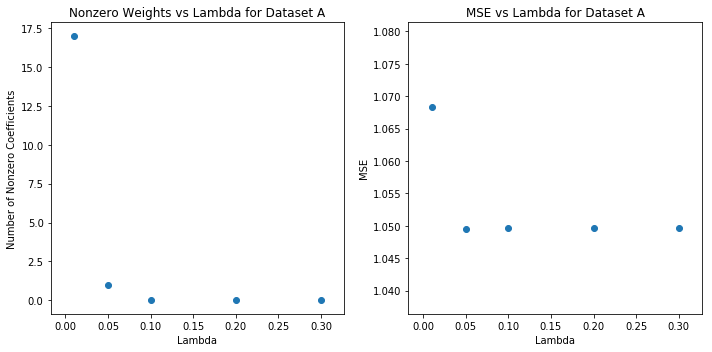

In [334]:
A.plot_nonzero_vs_lambda("A")

B

In [335]:
B = problem3Lasso(data_b, "B")
B.compute_metrics()
results_B = B.print_results().sort_values("Nonzero_Count", ascending=False)

Dataset: B
Most nonzeros:
Lambda = 0.01 had 9.0 nonzeros
Lowest Test Error:
Lambda = 0.01 had a test error of 0.018247756874594727 and 9.0 nonzero weights.


In [336]:
results_B

Lambda  Nonzero_Count       MSE
0    0.01              9  0.018248
3    0.20              7  0.141618
2    0.10              7  0.081374
1    0.05              7  0.059147
4    0.30              6  0.185557

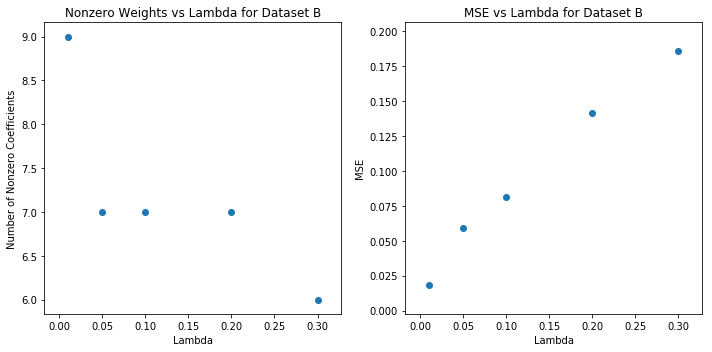

In [337]:
B.plot_nonzero_vs_lambda("B")

C

In [338]:
C = problem3Lasso(data_c, "C")
C.compute_metrics()
results_C = C.print_results().sort_values("Nonzero_Count", ascending=False)

Dataset: C
Most nonzeros:
Lambda = 0.01 had 9.0 nonzeros
Lowest Test Error:
Lambda = 0.1 had a test error of 1.8272345371027383 and 7.0 nonzero weights.


In [339]:
results_C

Lambda  Nonzero_Count       MSE
0    0.01              9  1.852457
1    0.05              8  1.837253
2    0.10              7  1.827235
3    0.20              6  1.836891
4    0.30              3  1.838880

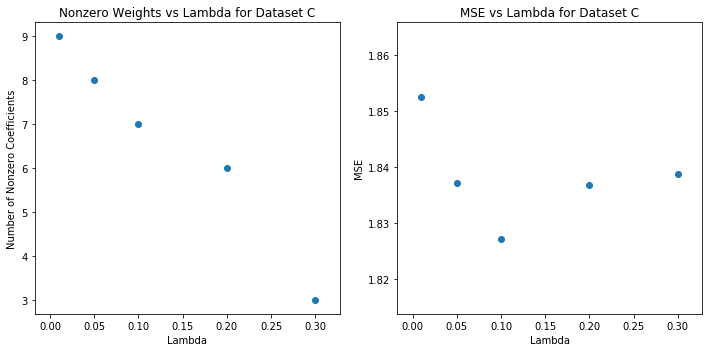

In [340]:
C.plot_nonzero_vs_lambda("C")

**E** For dataset A, I found that in recomputing the dataset several times, that for each trial, all of the weights become 0 for $\lambda \geq 0.1$

2. Now, we turn to Ridge regression. We'll use sklearn module `Ridge` (read more [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)). Repeat each of the experiment above using Ridge regression. Use $\lambda = 1, 50, 100, 200, 1000$.

In [341]:
class problem3Ridge():
    def __init__(self, dataset, label):
        self.dataset = dataset
        self.alphas = [1, 50, 100, 200, 1000]
        self.results = []
        self.label = label

    def compute_metrics(self):
        for alpha in self.alphas:
            regressor = Ridge(alpha=alpha)
            regressor.fit(self.dataset.train_x, self.dataset.train_y)
            nonzero_weights=regressor.coef_.nonzero()[0].shape[0]
            mse = sklearn.metrics.mean_squared_error(
                y_true=self.dataset.test_y,
                y_pred=regressor.predict(self.dataset.test_x)
            )
            self.results.append([alpha, nonzero_weights, mse])
    
    def print_results(self):
        final_results =pd.DataFrame(self.results, columns=['Lambda', 'Nonzero_Count', 'MSE'])
#         print("A lambda of {} had the most nonzero weights with {} nonzeros for dataset {}".format(
        final_results.sort_values("Nonzero_Count", ascending=False)
        print("Dataset: {}".format(self.label))
        print("Most nonzeros:")
        final_results.sort_values("Nonzero_Count", ascending=False)
        lambda_nonzero = final_results.loc[0]['Lambda']
        num_nonzeros = final_results.loc[0]['Nonzero_Count']
        print("Lambda = {} had {} nonzeros".format(lambda_nonzero, num_nonzeros))
        final_results.sort_values("MSE", ascending=True)
        lambda_mse = final_results.iloc[0]['Lambda']
        lowest_mse = final_results.iloc[0]['MSE']
        nonzero_mse = final_results.iloc[0]['Nonzero_Count']
        print("Lowest Test Error:")
        print("Lambda = {} had a test error of {} and {} nonzero weights.".format(lambda_mse, lowest_mse, nonzero_mse))
        final_results.sort_values("MSE", ascending=True)
        lambda_nonzero = final_results.loc[0]['Lambda']
        num_nonzeros = final_results.loc[0]['MSE']

        return(final_results)
    
    def plot_nonzero_vs_lambda(self, label):
        fig = plt.figure(figsize=(10, 5))
        ax1 = plt.subplot(121)
        ax1.scatter(self.alphas, [val[1] for val in self.results])
        ax1.set_title("Nonzero Weights vs Lambda for Dataset {}".format(label))
        ax1.set_xlabel("Lambda")
        ax1.set_ylabel("Number of Nonzero Coefficients")
        ax1.set_ylim([0, 30])
        ax2 = plt.subplot(122)
        ax2.scatter(self.alphas, [val[2] for val in self.results])
        ax2.set_title("MSE vs Lambda for Dataset {}".format(label))
        ax2.set_xlabel("Lambda")
        ax2.set_ylabel("MSE")
        fig.tight_layout()


In [342]:
A = problem3Ridge(data_a, "A")
A.compute_metrics()
results_A_ridge = A.print_results().sort_values("Nonzero_Count", ascending=False)

Dataset: A
Most nonzeros:
Lambda = 1.0 had 20.0 nonzeros
Lowest Test Error:
Lambda = 1.0 had a test error of 1.0818231364369764 and 20.0 nonzero weights.


In [343]:
results_A

Lambda  Nonzero_Count       MSE
0    0.01             17  1.068299
1    0.05              1  1.049503
4    0.30              0  1.049671
3    0.20              0  1.049671
2    0.10              0  1.049671

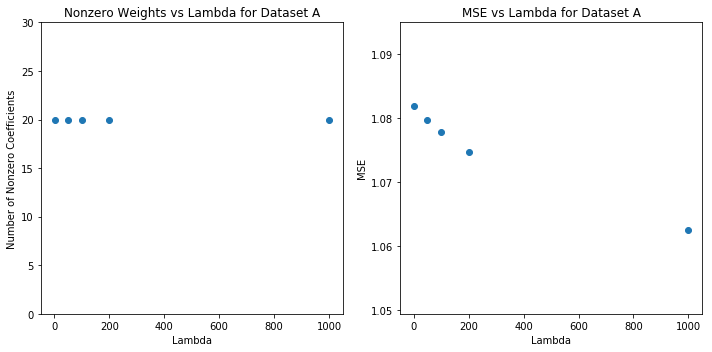

In [344]:
A.plot_nonzero_vs_lambda("A")

B

In [345]:
B = problem3Ridge(data_b, "B")
B.compute_metrics()
results_B_ridge = B.print_results().sort_values("Nonzero_Count", ascending=False)

Dataset: B
Most nonzeros:
Lambda = 1.0 had 9.0 nonzeros
Lowest Test Error:
Lambda = 1.0 had a test error of 0.0036802254541537607 and 9.0 nonzero weights.


In [346]:
results_B

Lambda  Nonzero_Count       MSE
0    0.01              9  0.018248
3    0.20              7  0.141618
2    0.10              7  0.081374
1    0.05              7  0.059147
4    0.30              6  0.185557

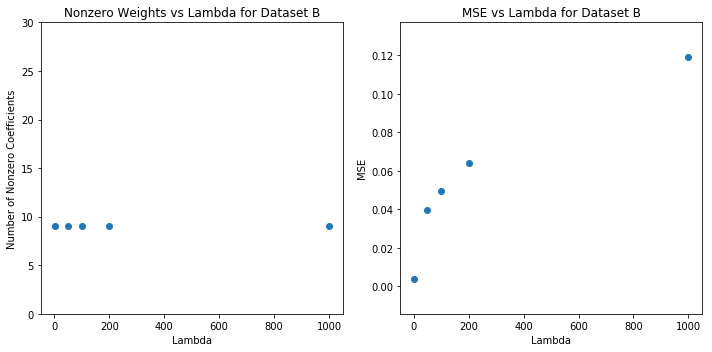

In [347]:
B.plot_nonzero_vs_lambda("B")

C

In [348]:
C = problem3Ridge(data_c, "C")
C.compute_metrics()
results_C_ridge = C.print_results().sort_values("Nonzero_Count", ascending=False)

Dataset: C
Most nonzeros:
Lambda = 1.0 had 10.0 nonzeros
Lowest Test Error:
Lambda = 1.0 had a test error of 1.856498881094282 and 10.0 nonzero weights.


In [349]:
results_C

Lambda  Nonzero_Count       MSE
0    0.01              9  1.852457
1    0.05              8  1.837253
2    0.10              7  1.827235
3    0.20              6  1.836891
4    0.30              3  1.838880

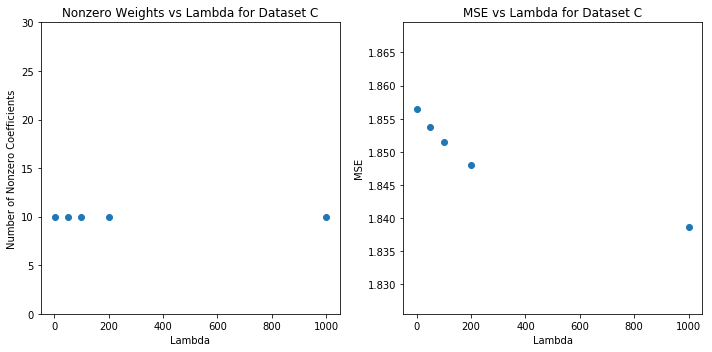

In [350]:
C.plot_nonzero_vs_lambda("C")

**E** For ridge regression, I found that the number of nonzero elements is independent of what values lambda takes on.

3. Compare the two algorithms on each data set: compare the number of non-zero coordinates of the $\mathbf w_d$'s, and compare the test error rates of the $\mathbf w_b$'s. Report your results and comment on them.

In [357]:
results_A.sort_values("MSE")

Lambda  Nonzero_Count       MSE
1    0.05              1  1.049503
4    0.30              0  1.049671
3    0.20              0  1.049671
2    0.10              0  1.049671
0    0.01             17  1.068299

In [358]:
results_A_ridge.sort_values("MSE")

Lambda  Nonzero_Count       MSE
4    1000             20  1.062521
3     200             20  1.074631
2     100             20  1.077816
1      50             20  1.079714
0       1             20  1.081823

In [359]:
results_B.sort_values("MSE")

Lambda  Nonzero_Count       MSE
0    0.01              9  0.018248
1    0.05              7  0.059147
2    0.10              7  0.081374
3    0.20              7  0.141618
4    0.30              6  0.185557

In [360]:
results_B_ridge.sort_values("MSE")

Lambda  Nonzero_Count       MSE
0       1              9  0.003680
1      50              9  0.039715
2     100              9  0.049680
3     200              9  0.063935
4    1000              9  0.119211

In [361]:
results_C.sort_values("MSE")

Lambda  Nonzero_Count       MSE
2    0.10              7  1.827235
3    0.20              6  1.836891
1    0.05              8  1.837253
4    0.30              3  1.838880
0    0.01              9  1.852457

In [362]:
results_C_ridge.sort_values("MSE")

Lambda  Nonzero_Count       MSE
4    1000             10  1.838594
3     200             10  1.848064
2     100             10  1.851550
1      50             10  1.853820
0       1             10  1.856499

**$w_b$** (Nonzero Weights)

*lasso*: The $w_b$ values tended to occur at the end of the $\lambda$ spectrum. While only dataset a was able to obtain 0 nonzero weights at $\lambda = 0.1$, the general trend was that as $\lambda$ increased, the number of non-zero elements decreased.

*ridge:*
For ridge regression, there did not appear to be any correlation between the value taken on by $\lambda$ and the number of nonzero weights

**$w_d$** (MSE Rates)

The $w_d$ values across the different regression methods shared similar trends with MSE generally decreasing as lambda increased for dataset A, $w_d$ generally increasing for dataset B, and staying within a very tight $\sim 0.03$ window for dataset C. 

Directly comparing these two methods, we can see that LASSO regression outperforms ridge regression for datasets A and C, but for dataset B, Ridge regression is better by a much wider margin.


## Kernel Perceptron - 5 points

Implement the Kernel Perceptron as described in the lecture using different kernel functions. Use the training and test data provided below to train and test your implementation. Report the error rate for each kernel function.

In [1]:
from scipy.io import loadmat
class Data:
    def __init__(self):
        ff = lambda x,y : loadmat(x)[y]
        
        self.X_train = ff("data/iris_3/train_data.mat", "train_data")
        self.y_train = ff("data/iris_3/train_labels.mat", "train_labels").flatten()
        
        self.X_test = ff("data/iris_3/test_data.mat", "test_data")
        self.y_test = ff("data/iris_3/test_labels.mat", "test_labels").flatten()

In [2]:
test_data = Data()

**A:** Implement the kernel functions below:

In [3]:
import numpy as np
from numpy import linalg

def linear_kernel(x, y):
    return np.dot(x, y)
        
        
def polynomial_kernel(x, y, p = 3):
    return np.power(np.dot(x.transpose(), y), p)
    
    
def gaussian_kernel(x, y, sigma = 0.5):
    return np.exp(-np.linalg.norm(x - y)**2/(2 * sigma**2))

**B:** Implement the following methods of the `KernelPerceptron` class. The `__init__` takes also as input the kernel to use. `Niter` is equivalent to `t` as per the lecture slides. You are allowed to introduce new class variables/methods.

* Implement the `fit` method. Taking as input the training data, it learns the model parameters
* Implement the `predict` method which takes as input new examples and returns the estimated label 

In [109]:
class KernelPerceptron:
    def __init__(self, kernel = linear_kernel, Niter = 20):
        
        self.kernel = kernel
        self.Niter = Niter
        self.support_vector_x = None
        self.support_vector_y = None
        self.alphas = None     
        self.K = None
        
    def fit(self, X, y):
        self.support_vector_x = X
        self.support_vector_y = y.astype(float)
        self.alphas = np.zeros(X.shape[0])
        
        
        # Compare each datapoint with every other datapoint. 
        self.K = np.zeros((X.shape[0], X.shape[0]))
        # Compute kernel matrix:
        for i in range(X.shape[0]):
            for j in range(X.shape[0]):
                self.K[i, j] = self.kernel(X[i], X[j])
                
        # The main goal is to assign weights to alpha vector.
        for count in range(self.Niter):
            for i in range(X.shape[0]):
                prod = self.alphas * self.support_vector_y * self.K[i, :]
                if np.sign(prod.sum)
#                 this_sum = 0
#                 for v in range(X.shape[0]):
#                     this_sum += self.alphas[v] * self.support_vector_y[v] * self.K[i, v]
#                 if np.sign(this_sum) != np.sign(self.support_vector_y[i]):
                    self.alphas[i] += 1
            
        
    def predict(self, X):
        K = np.zeros((X.shape[0], self.support_vector_x.shape[0]))
        # Compute kernel matrix:
        results = []
        for i in range(X.shape[0]):
            for j in range(self.support_vector_x.shape[0]):
                self.K[i, j] = self.kernel(X[i], self.support_vector_x[j])
                
        for i in range(X.shape[0]):
            this_sum = 0
            for v in range(self.support_vector_x.shape[0]):
                this_sum += self.alphas[v] * self.support_vector_y[v] * self.K[i, v]
            if this_sum <= 0:
                results.append(-1)
            else:
                results.append(1)   
        return np.array(results)
        
    @staticmethod
    def accuracy(y_pred, y_true):
        correct = 0
        for i in range(y_pred.shape[0]):
            if y_pred[i] == y_true[i]:
                correct += 1
        return correct / y_pred.shape[0]

**C:** Report the test error for each kernel function for `Niter = 20`

Linear

In [126]:
y_float = test_data.y_train.astype(float)

In [135]:
test = KernelPerceptron(kernel=linear_kernel)
test.fit(test_data.X_train, y_float)
y_pred = test.predict(test_data.X_test)
accuracy = test.accuracy(y_pred, test_data.y_test)
print("Error Rate for the linear kernel is: {}".format(1-accuracy))

Error Rate for the linear kernel is: 0.4


Polynomial

In [133]:
test = KernelPerceptron(kernel=polynomial_kernel)
test.fit(test_data.X_train, y_float)
y_pred = test.predict(test_data.X_test)
accuracy = test.accuracy(y_pred, test_data.y_test)
print("Error Rate for the Polynomial kernel is: {}".format(1-accuracy))

Error Rate for the Polynomial kernel is: 0.4666666666666667


Gaussian

In [134]:
test = KernelPerceptron(kernel=gaussian_kernel)
test.fit(test_data.X_train, y_float)
y_pred = test.predict(test_data.X_test)
y_pred = test.predict(test_data.X_test)
accuracy = test.accuracy(y_pred, test_data.y_test)
print("Error Rate for the Gaussian kernel is: {}".format(1-accuracy))

Error Rate for the Gaussian kernel is: 0.06666666666666665
